In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel(r'training model with all logs.xlsx')
df.head()

,RT,DEN,CNL,AC,GR,TOCmea,S1mea,S2mea
0,2.101,2.483,28.605,98.687,70.315,1.44,2.46,3.24
1,2.793,2.504,23.828,89.706,66.399,1.45,3.28,4.20
2,1.751,2.513,22.268,89.514,70.237,1.60,2.69,4.42
3,3.225,2.490,21.568,89.871,63.177,1.64,2.71,4.79
4,1.580,2.503,26.715,96.431,69.392,1.77,3.96,5.68


In [3]:
df.corr()

,RT,DEN,CNL,AC,GR,TOCmea,S1mea,S2mea
RT,1.000000,-0.310926,0.104536,0.149240,-0.048547,0.615068,0.573705,0.611718
DEN,-0.310926,1.000000,-0.836608,-0.911378,-0.565657,-0.726897,-0.734330,-0.763170
CNL,0.104536,-0.836608,1.000000,0.918208,0.673465,0.588232,0.535665,0.644208
AC,0.149240,-0.911378,0.918208,1.000000,0.609294,0.709943,0.639788,0.742202
GR,-0.048547,-0.565657,0.673465,0.609294,1.000000,0.251211,0.257407,0.286244
TOCmea,0.615068,-0.726897,0.588232,0.709943,0.251211,1.000000,0.849372,0.983431
S1mea,0.573705,-0.734330,0.535665,0.639788,0.257407,0.849372,1.000000,0.869001
S2mea,0.611718,-0.763170,0.644208,0.742202,0.286244,0.983431,0.869001,1.000000


In [4]:
# selecting features and label
X = df.iloc[:, :-3]  # features
y = df.iloc[:,-3]  # label
X.shape, y.shape

((125, 5), (125,))

In [5]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [6]:
# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the time taking by the models
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score


regr = ExtraTreesRegressor()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': Integer(10, 200),  # Number of trees
    'max_depth': Integer(3, 50),  # Depth of the tree
    'max_features': Categorical(['sqrt', 'log2', None]),  # Feature selection strategies
    'criterion': Categorical(['squared_error', 'absolute_error']),  # Loss function
    
}



evolved_estimator = GASearchCV(
    estimator=regr,
    cv=5,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    param_grid=param_grid,
    n_jobs=-1,  # Use all available cores
    verbose=True,
    population_size=20,  # Size of the candidate population
    generations=50,  # Number of generations
    crossover_probability=0.8,  # Probability of crossover between solutions
    mutation_probability=0.1,  # Probability of mutation in a solution
    tournament_size=3,  # Size of the tournament for selection
    elitism=True,  # Keep the best solution in each generation
    criteria="max",  # Optimization criteria: 'max' for maximization or 'min' for minimization
      
)


# Fit the model
evolved_estimator.fit(X_train, y_train)

# Evaluate the best model
best_model = evolved_estimator.best_estimator_
y_pred = best_model.predict(X_test)

# Results
print("Best Parameters:", evolved_estimator.best_params_)
print("Best CV Negative MSE:", evolved_estimator.best_score_)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	20    	-0.889878	0.0241453  	-0.841402  	-0.970355  
1  	38    	-0.870676	0.0206045  	-0.829397  	-0.904848  
2  	35    	-0.844031	0.0168196  	-0.829397  	-0.880607  
3  	38    	-0.836643	0.0166761  	-0.815649  	-0.873993  
4  	37    	-0.829133	0.0102001  	-0.815649  	-0.849965  
5  	37    	-0.82449 	0.014859   	-0.815649  	-0.882484  
6  	38    	-0.817023	0.00412455 	-0.815649  	-0.829397  
7  	38    	-0.815385	0.000527674	-0.814329  	-0.815649  
8  	37    	-0.814857	0.000646266	-0.814329  	-0.815649  
9  	38    	-0.814395	0.00028751 	-0.814329  	-0.815649  
10 	38    	-0.814329	3.33067e-16	-0.814329  	-0.814329  
11 	37    	-0.814329	3.33067e-16	-0.814329  	-0.814329  
12 	34    	-0.814329	3.33067e-16	-0.814329  	-0.814329  
13 	35    	-0.814329	3.33067e-16	-0.814329  	-0.814329  
14 	35    	-0.814329	3.33067e-16	-0.814329  	-0.814329  
15 	38    	-0.814329	3.33067e-16	-0.814329  	-0.814329  
16 	37    	-0.814329	3.33067e-1

In [12]:
# Best parameters found
print("Best Parameters:", evolved_estimator.best_params_)

# Use the model fitted with the best parameters to predict on the test set
y_predict_ga = evolved_estimator.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_predict_ga)
r2 = r2_score(y_test, y_predict_ga)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Best Parameters: {'n_estimators': 69, 'max_depth': 6, 'max_features': 'log2', 'criterion': 'squared_error'}
Mean Squared Error (MSE): 0.6087
R² Score: 0.8193


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn_genetic\plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


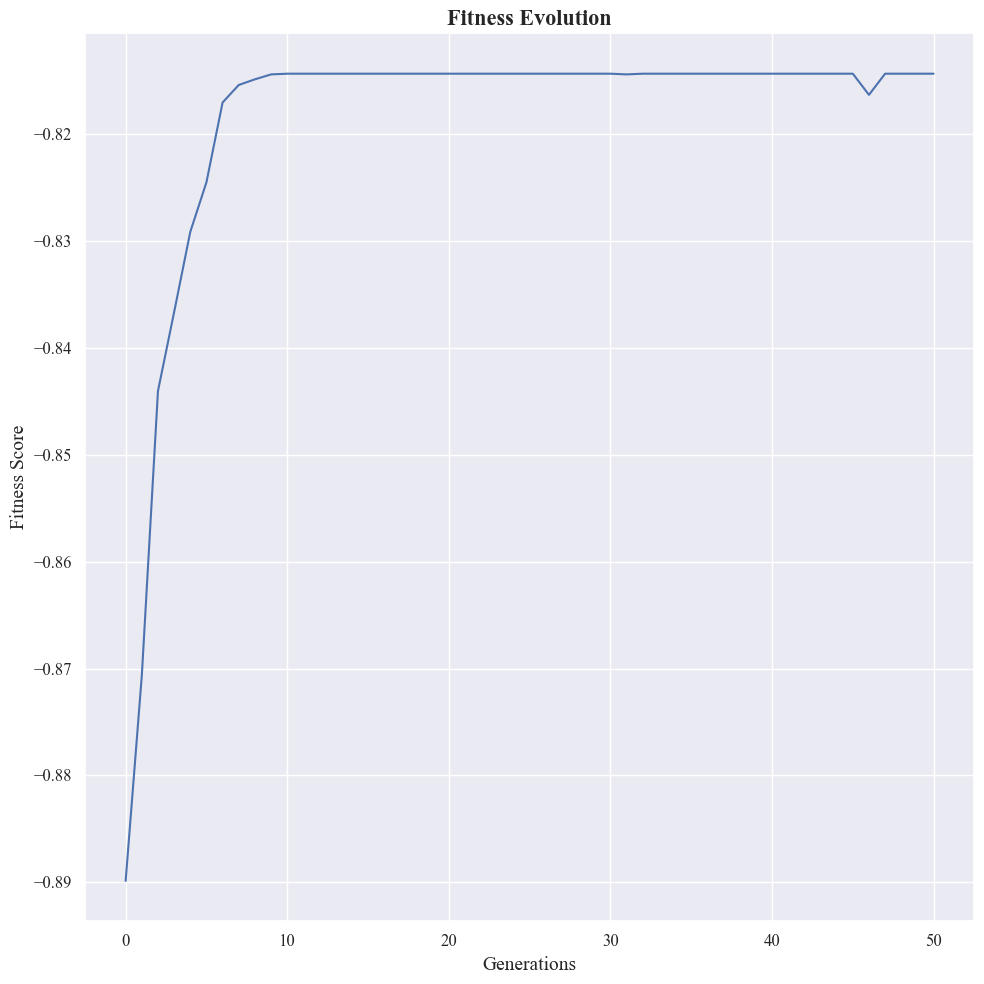

In [13]:
from sklearn_genetic.plots import plot_fitness_evolution
import matplotlib.pyplot as plt

# Generate the plot
plot_fitness_evolution(evolved_estimator)

# Customizing the appearance
plt.title("Fitness Evolution", fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.xlabel("Generations", fontsize=14, fontname='Times New Roman')
plt.ylabel("Fitness Score", fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("fitness_evolution_plot.png", dpi=300, bbox_inches='tight', format='png')  # Save as PNG with high resolution

# Show the plot
plt.show()


In [14]:
from sklearn_genetic.plots import plot_search_space
import matplotlib.pyplot as plt

# Visualize the search space
plot_search_space(evolved_estimator, features=['n_estimators', 'max_depth','min_samples_split','min_samples_leaf'])
plt.show()


KeyError: "['min_samples_split', 'min_samples_leaf'] not in index"

In [28]:
from sklearn_genetic.plots import plot_search_space
import matplotlib.pyplot as plt

# Visualize the search space
fig = plot_search_space(
    evolved_estimator, 
    features=['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']
)

# Customize appearance for professionalism
#plt.title("Search Space Visualization", fontsize=16, fontweight='bold', fontname='Times New Roman', pad=15)
plt.xlabel("Feature 1: n_estimators", fontsize=14, fontweight='bold', fontname='Times New Roman', labelpad=10)
plt.ylabel("Feature 2: max_depth", fontsize=14, fontweight='bold', fontname='Times New Roman', labelpad=10)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')

# Add a grid for better readability
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot in high resolution (1000 DPI)
plt.savefig("search_space_visualization.png", dpi=1000, bbox_inches='tight', format='png')  # Save as PDF
plt.savefig


c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwar

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

In [29]:
import os

# Create the output/cnn directory if it doesn't exist
output_dir = "./output/extra_trees"
os.makedirs(output_dir, exist_ok=True)

In [30]:
# converting the results to a readable format using dataFrame
df = pd.DataFrame(evolved_estimator.cv_results_)
# getting all parameter combinations and their performance result
result = df[['param_n_estimators', 'param_max_depth','param_criterion', 'param_max_features','param_min_samples_split','param_min_samples_leaf']]
result.to_csv('./output/extra_trees/performance_result_for_extra_trees_gridsearchCV.csv')
result

,param_n_estimators,param_max_depth,param_criterion,param_max_features,param_min_samples_split,param_min_samples_leaf
0,100,11,squared_error,sqrt,8,2
1,69,5,squared_error,None,3,2
2,22,16,squared_error,None,2,1
3,86,20,squared_error,None,3,3
4,64,7,absolute_error,log2,10,4
...,...,...,...,...,...,...
3624,99,20,squared_error,log2,10,1
3625,99,20,squared_error,log2,10,1
3626,99,20,squared_error,log2,10,1
3627,99,20,squared_error,log2,10,1


In [31]:
pred_1 = evolved_estimator.predict(X_train) # prediction for training set
pred_2 = evolved_estimator.predict(X_test) # prediction for testing set
pred_3 = evolved_estimator.predict(X) # prediction for whole dataset

In [32]:
# saving training, testing and y data with their predicted data in a excel file with different sheets
a = np.stack([y_train, pred_1], axis=1) # training
a = pd.DataFrame(a, columns=['y_train', 'y_train_pred'])

b = np.stack([y_test, pred_2], axis=1) # testing 
b = pd.DataFrame(b, columns=['y_test', 'y_test_pred'])

c = np.stack([y, pred_3], axis=1) # whole data
c = pd.DataFrame(c, columns=['y', 'y_pred'])

with pd.ExcelWriter("./output/extra_trees/predicted_extra_trees_model.xlsx") as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    a.to_excel(writer, sheet_name="training", index=True)
    b.to_excel(writer, sheet_name="testing", index=True)
    c.to_excel(writer, sheet_name="whole_data", index=True)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

train_r2 = r2_score(y_train,pred_1) # r2_score for training set
train_mae = mean_absolute_error(y_train, pred_1) # mean absolute error for training set
train_mse = mean_squared_error(y_train, pred_1) # mean squared error for training set
train_mape = mean_absolute_percentage_error(y_train, pred_1) # mean_absolute_percentage_error for training set
train_ev = explained_variance_score(y_train, pred_1) 
train_maxE = max_error(y_train, pred_1)
train_minE = min(abs(y_train - pred_1))

test_r2 = r2_score(y_test, pred_2) # r2_score for testing set
test_mae = mean_absolute_error(y_test, pred_2) # mean absolute error for testing set
test_mse = mean_squared_error(y_test, pred_2) # mean squared error for testing set
test_mape = mean_absolute_percentage_error(y_test, pred_2) # mean_absolute_percentage_error for testing set
test_ev = explained_variance_score(y_test, pred_2) 
test_maxE = max_error(y_test, pred_2)
test_minE = min(abs(y_test - pred_2))

r2 = r2_score(y, pred_3) # r2_score for whole dataset
mae = mean_absolute_error(y, pred_3) # mean absolute error for whole dataset
mse = mean_squared_error(y, pred_3) # mean squared error for whole dataset
mape = mean_absolute_percentage_error(y, pred_3) # mean_absolute_percentage_error for whole dataset
ev = explained_variance_score(y, pred_3) 
maxE = max_error(y, pred_3)
minE = min(abs(y - pred_3))

metrics = {
'performance_metrics': ['R2', 'MAE', 'MSE', 'MAPE', 'EV', 'maxE', 'minE'],
'training': [train_r2, train_mae, train_mse, train_mape, train_ev, train_maxE, train_minE],
'testing': [test_r2, test_mae, test_mse, test_mape, test_ev, test_maxE, test_minE],
'whole': [r2, mae, mse, mape, ev, maxE, minE]
}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()
performance.to_csv('./output/extra_trees/performance_extra_trees.csv')
performance

,0,1,2,3,4,5,6
performance_metrics,R2,MAE,MSE,MAPE,EV,maxE,minE
training,0.875068,0.465972,0.336722,0.661247,0.875068,1.97734,0.000429
testing,0.772463,0.635295,0.658595,0.483457,0.772465,2.549832,0.000188
whole,0.84276,0.516769,0.433284,0.60791,0.84276,2.549832,0.000188


In [34]:
from joblib import dump, load
import os

# Extract the best estimator
best_model = evolved_estimator.best_estimator_

# Ensure the directory exists
output_dir = './output/extra_trees'
os.makedirs(output_dir, exist_ok=True)

# Save the best model
model_path = os.path.join(output_dir, 'best_extra_trees_model.joblib')
dump(best_model, model_path)

print(f"Best model saved to: {model_path}")


#clf = load('trained_linear_regression_model.joblib')

Best model saved to: ./output/extra_trees\best_extra_trees_model.joblib
